In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Generamos un pipe para limpiar el dataset

In [60]:
boston_frame=(pd.read_csv('Boston.csv')
              .drop(columns=['Unnamed: 0'],axis=1)
              .rename(columns={'nox':'nx','black':'b'})
              .rename(columns=str.upper)
             )

boston_frame.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [61]:
boston_frame.shape

(506, 14)

La variable target es MEDV que es el valor medio de las viviendas ocupadas por sus propietarios en 1000 usd

In [62]:
#CREAMOS LOS ARREGLOS PARA LOS FEATURES(X) Y LA VARIABLE TARGET(Y)
X=boston_frame.drop(columns=['MEDV'],axis=1).values
Y=boston_frame['MEDV'].values

In [63]:
#SEPAREMOS LOS DATOS EN PRUEBA Y ENTRENAMIENTO
X_train,x_test,Y_train,y_test=train_test_split(X,Y,
                                              test_size=0.8
                                              ,random_state=42)

In [64]:
#INSTANCIAMOS EL MODELO DE REGRESION LINEAL
Lin_reg=LinearRegression()

In [65]:
#AJUSTAMOS EL MODELO
Lin_reg.fit(X_train,Y_train)

LinearRegression()

In [66]:
#PREDECIMOS DE ACUERDO A LOS DATOS DE PRUEBA
Y_predict=Lin_reg.predict(x_test)

In [67]:
Y_predict

array([27.01908587, 36.39926682, 19.52223675, 25.26810254, 19.46487293,
       23.79870856, 17.18010037, 16.20711737, 23.68847101, 20.04220179,
       26.36855152, 18.59327186, -6.4664329 , 22.95909013, 17.40686932,
       27.43257758, 19.92666616,  6.58724548, 39.32182162, 17.90432857,
       26.00668515, 28.80570525, 10.37477062, 22.76021909, 17.92978821,
       16.18952859, 23.71007322, 15.54932536, 23.46234325, 18.71440048,
       20.59025588, 23.73922927, 25.63449   , 16.74323723, 18.1406512 ,
       17.2356924 , 29.84079468, 17.83161727, 25.38606905, 25.27635836,
       14.07970302, 28.90885816, 41.21058241, 17.56791799, 25.57994553,
       17.0569498 , 12.4612    , 26.53317464, 21.41130736, 28.45234887,
       20.77316517, 32.93038487, 14.8266904 , 25.19421146, 38.17415252,
       23.98854895, 19.05440652, 30.50321095, 23.82730866, 12.46879907,
       21.54510185, 28.72042986, 30.44440582, 14.78885693, 20.44691982,
       17.92921098, 20.86597534, 24.75293069, 28.72257558, 12.63

EVALUACION DEL MODELO

In [68]:
from sklearn import metrics

PROCEDEREMOS A EVALUAR EL MODELO DE ACUERDO AL FACTOR DE DETERMINACION R^2

In [69]:
metrics.r2_score(y_test,Y_predict) #EVALUAMOS LA R^2 EN LOS DATOS DE PRUEBA Y LOS DE PREDICCION es decir la diferencia entre los puntos y el modelo

0.7079608143498475

In [70]:
#EVALUAMOS LA R^2 en los datos de prueba evalua que tanto se ajustan
print("R^2",Lin_reg.score(x_test,y_test))

R^2 0.7079608143498475


MAE
Error medio absoluto. Penaliza por igual todas las diferencias. Es muy sensible a outliers y valores inesperados.

In [71]:
MAE=np.mean(np.abs(y_test-Y_predict))
MAE

3.5419150344712698

In [72]:
MAE2=metrics.mean_absolute_error(y_test,Y_predict)
MAE2

3.5419150344712698

MSE
Error cuadrático medio. Penaliza más las grandes diferencias que las pequeñas.

In [73]:
MSE=np.mean((y_test-Y_predict)**2)

In [74]:
MSE

25.564048911173387

In [75]:
metrics.mean_squared_error(y_test,Y_predict)

25.564048911173387

RMSE
Raíz error cuadrático medio. Penaliza más las grandes diferencias que las pequeñas. Es interpretable en las mismas unidades que y.

In [76]:
RMSE=np.sqrt(np.mean((y_test-Y_predict)**2))
RMSE

5.05609027917554

In [77]:
np.sqrt(metrics.mean_squared_error(y_test,Y_predict))

5.05609027917554

REGULARIZACION
La regularización puede ayudarnos a reducir los efectos del bias y la varianza y en esta parte veremos como utilizarla en modelos de regresión.
La Regresión Lasso usa un tipo de regularización que impone una restricción utilizando la norma  L1 . Este tipo de regularización es útil cuando creemos que muchas de los parámetros del modelo no son relevantes.

In [78]:
#LASSO REGRESSION
from sklearn.linear_model import Lasso

In [80]:
lasso_models={}
training_scores=[]
test_scores=[]
alphas = [100, 30, 10, 5, 1, 0.1, .01, 0.001, 0.0001, 0.00001, 0.000001]
for alpha in alphas:
    lasso=Lasso(alpha=alpha).fit(X_train,Y_train)
    training_scores.append(lasso.score(X_train,Y_train))
    test_scores.append(lasso.score(x_test,y_test))
    lasso_models[alpha]=lasso

In [91]:
#alfa=0.0001
#Lassou=Lasso(alpha=alfa).fit(X_train,Y_train)
#Lassou.predict(x_test)

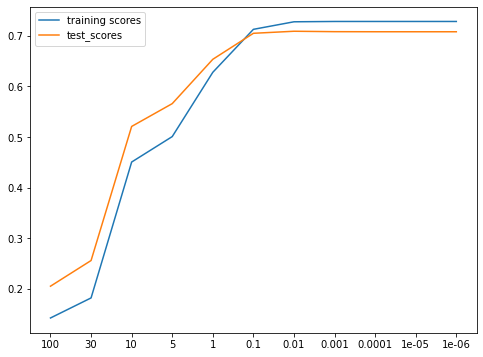

In [93]:
plt.figure(figsize=(8,6))
plt.plot(training_scores,label='training scores')
plt.plot(test_scores,label='test_scores')
plt.xticks(range(len(alphas)),alphas)
plt.legend(loc='best')

In [96]:
list(zip([100, 30, 10, 5, 1, 0.1, .01, 0.001, 0.0001, 0.00001, 0.000001],test_scores))

[(100, 0.205173614706199),
 (30, 0.25590815412158097),
 (10, 0.520881251951218),
 (5, 0.565934980798863),
 (1, 0.6535653753160684),
 (0.1, 0.7049260440433983),
 (0.01, 0.7089700757579067),
 (0.001, 0.7081346347853121),
 (0.0001, 0.707978924446144),
 (1e-05, 0.7079626327428502),
 (1e-06, 0.7079609962591233)]

AHORA QUE SABEMOS QUE LA ALPHA =0.01, con un coeficiente de determinacion R^2=0.708970

In [97]:
#INSTANCIAMOS EL MODELO
Lassou=Lasso(alpha=0.01)

In [98]:
#AJUSTAMOS EL MODELO CON LOS DATOS DE ENTRENAMIENTO
Lassou.fit(X_train,Y_train)

Lasso(alpha=0.01)

In [102]:
#predecimos con los datos de prueba
lasso_predict=Lassou.predict(x_test)

In [103]:
lasso_predict

array([26.83067353, 36.20887589, 19.25433108, 25.16785747, 19.48943865,
       23.31227057, 17.16658574, 16.16136784, 22.99957826, 20.12081293,
       25.99028682, 18.54947469, -6.25928491, 22.61716182, 17.37991474,
       27.15508468, 19.68681647,  6.50653183, 39.20812127, 17.9367682 ,
       26.11793283, 28.70008488, 10.43102681, 23.01288246, 17.9677077 ,
       15.68650676, 23.43015671, 15.61265941, 23.07310475, 18.86182824,
       20.35824397, 23.8037626 , 25.54825181, 17.03033902, 17.57706257,
       18.09369992, 29.81082445, 18.12826992, 25.16754025, 25.16680125,
       14.17112958, 28.73211175, 41.01351167, 17.45030782, 25.53802418,
       17.00676474, 12.51346792, 26.42319656, 20.93417854, 28.66133573,
       20.74196878, 32.79338398, 14.89425435, 25.19372597, 38.30012643,
       23.74509169, 19.15157128, 30.45033819, 23.77947589, 12.32363427,
       21.6654352 , 28.8804262 , 30.48452765, 15.12054078, 20.72390399,
       17.48274699, 20.77018741, 24.72400205, 28.80689447, 12.68

In [104]:
print("R^2",Lassou.score(x_test,y_test))

R^2 0.7089700757579067


In [106]:
print('rmse',np.sqrt(metrics.mean_squared_error(y_test,lasso_predict)))

rmse 5.047346019010183


In [108]:
#compute and print the coeficient
lasso_coef=Lassou.coef_
print(lasso_coef)

[-1.63752902e-01  1.99355434e-02  1.27590485e-01  4.66834233e+00
 -1.51714423e+01  4.99782918e+00 -3.52489569e-02 -1.25840038e+00
  1.26652962e-01  2.94006360e-05 -1.06939153e+00  1.19211463e-02
 -3.84295981e-01]


In [109]:
df_columns=boston_frame.drop(columns='MEDV',axis=1).columns
#coeficientes=pd.Series()

In [110]:
df_columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [111]:
coeficientes=pd.Series(lasso_coef,index=df_columns).sort_values(ascending=True)
coeficientes

NX        -15.171442
DIS        -1.258400
PTRATIO    -1.069392
LSTAT      -0.384296
CRIM       -0.163753
AGE        -0.035249
TAX         0.000029
B           0.011921
ZN          0.019936
RAD         0.126653
INDUS       0.127590
CHAS        4.668342
RM          4.997829
dtype: float64

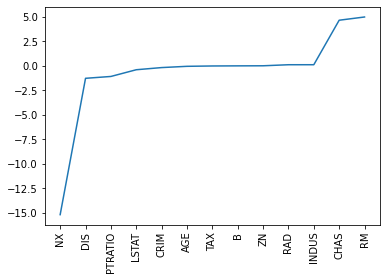

In [112]:
plt.plot(range(len(coeficientes.index)),coeficientes.values)
plt.xticks(range(len(coeficientes.index)),coeficientes.index,rotation=90)
plt.show()

SEGUNDA REGRESION TIPO RIDGE
La Regresión Ridge es un método de regularización que impone una restricción a los pesos del modelo de regresión simple. La regresión que impone la Regresión de Ridge se basa en la norma

In [133]:
from sklearn.linear_model import Ridge

In [154]:
ridge_models={}
test_scores=[]
training_scores=[]
alphas=[100, 30, 10, 5, 1, 0.1, .01, 0.001]
for alphar in alphas:
    ridge=Ridge(alpha=alphar).fit(X_train,Y_train)
    test_scores.append(ridge.score(x_test,y_test))
    training_scores.append(ridge.score(X_train,Y_train))
    ridge_models[alphar]=ridge

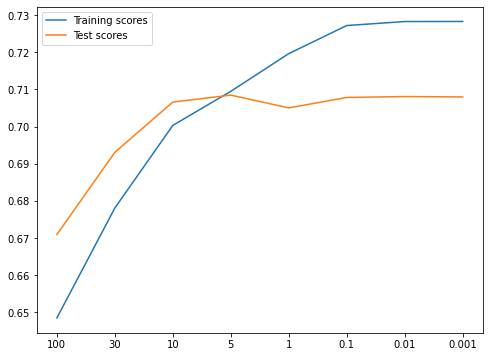

In [155]:
plt.figure(figsize=(8,6))
plt.plot(training_scores,label='Training scores')
plt.plot(test_scores,label='Test scores')
plt.xticks(range(len(alphas)),alphas)
plt.legend(loc='best')

In [157]:
list(zip([100, 30, 10, 5, 1, 0.1, .01, 0.001],test_scores))

[(100, 0.6709066094576044),
 (30, 0.6930679428848887),
 (10, 0.7065995399152003),
 (5, 0.708466297448287),
 (1, 0.7050279992803692),
 (0.1, 0.7078333444365953),
 (0.01, 0.7080866492207936),
 (0.001, 0.7079761065699833)]

THE BEST ALPHA IN THIS CASE IS 0.001 WITH THE DETERMINATION SCORE OF 0.7283

In [158]:
alphi=0.001
r2=0.7283
#INSTANCIAR EL MODELO RIDGE
Ridges=Ridge(alpha=alphi)

In [159]:
#AJUSTAR EL MODELO 
Ridges.fit(X_train,Y_train)

Ridge(alpha=0.001)

In [160]:
#PREDCITOR
Y_predictor=Ridges.predict(x_test)

In [161]:
Y_predictor

array([27.01527012, 36.3980252 , 19.51748869, 25.26602638, 19.4653668 ,
       23.78940165, 17.17975557, 16.20673024, 23.67510146, 20.04358679,
       26.36385584, 18.59221866, -6.46297494, 22.95267671, 17.40573312,
       27.42765426, 19.92165411,  6.58546436, 39.31984832, 17.90487277,
       26.00855253, 28.80342631, 10.37571308, 22.76499435, 17.93017798,
       16.17939083, 23.70456442, 15.55066099, 23.45739352, 18.71698741,
       20.58534315, 23.74023963, 25.633229  , 16.74763941, 18.12995784,
       17.25160512, 29.84028901, 17.83675558, 25.38453825, 25.27435269,
       14.08135651, 28.90514172, 41.20696256, 17.56537776, 25.57905041,
       17.05557991, 12.46180745, 26.53122954, 21.40218127, 28.45607195,
       20.77216674, 32.9277479 , 14.82795385, 25.19425265, 38.17680263,
       23.98386342, 19.05612964, 30.50163852, 23.82636155, 12.46557283,
       21.54727285, 28.72313242, 30.44512039, 14.79466084, 20.45176152,
       17.92303921, 20.86423038, 24.75205808, 28.72363417, 12.63

In [162]:
#COEFICIENTE DE DETERMINACION
print('R^2',Ridges.score(x_test,y_test))

R^2 0.7079761065699833


In [163]:
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,Y_predictor)))

RMSE 5.055957899923757
